In [1]:
# Importing the required packages here

import numpy as np
import pandas as pd

import fuzzywuzzy
from fuzzywuzzy import process
import chardet

# set seed for reproducibility
np.random.seed(0)

import seaborn as sns
import missingno as msno

import warnings
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.mathtext import MathTextWarning

from matplotlib.animation import FuncAnimation
import plotly.graph_objects as go
import plotly.express as px

import bar_chart_race as bcr
from IPython.display import Video

In [183]:
# load the Forbes Richest Athletes dataset and create a dataframe
athlete_df = pd.read_csv('Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv')

# dataframe columns or series
print(athlete_df.columns)

# Number of observations and columns
print('\n', athlete_df.shape)

Index(['S.NO', 'Name', 'Nationality', 'Current Rank', 'Previous Year Rank',
       'Sport', 'Year', 'earnings ($ million)'],
      dtype='object')

 (301, 8)


# 1. Introduction

## 1.1 Description 

The project aims to analyze the Forbes Richest Athletes dataset. The dataset to be explored in the below EDA is that of the perfomance of highest paid athletes between the year 1990 and 2020 according to Forbes. The dataset provides information on the earnings of athletes from various sports, allowing for an in-depth exploration of their financial success over the years. The research question revolves around understanding the trends, patterns, and factors influencing athlete earnings and identifying the top-earning athletes across different time periods.

The data set contains 301 records collected over a period of 3 decades since the year 1990, suggesting that the data represent lists of top 10 highest earnings athletes for each of the 30 years. There are 8 series in the set describing the athlete, their sports proffession, through to their yearly total earnings.

By conducting a comprehensive analysis of the Forbes Richest Athletes dataset, this project aims to provide valuable insights into the financial dynamics of professional sports, understand the factors influencing athlete earnings, and identify trends and patterns in the highest-earning athletes. The findings can be utilized by sports organizations, athletes, sponsors, and investors to make informed decisions and understand the financial landscape of the sports industry.

## 1.2 Purpose of EDA

As part of this EDA, the main goals are to extract the underlying parttens of athlete's perfomances in annual earnings over the years of their involvement in sports. The distribution of earnings over different sports, countries, and time will be explored. This data set only includes yearly total earnings of each sports personality, where total earnings are a sum of salaries and endorsements. There are huges somes of earnings generated by sports personilities in other avenues other than the field of play through endorsements, such as promotions, sponsorships,appearances at events, and businesses to name a few. As such, an athlete can be the richest athlete with minimal field appearances in a particular year due to the offset of endorsements. We notice that the dataset does not contain data about the number of appearances of each sports personality resoanably so because these vary incredibly from sport to sport.

# 2. Richest Athletes (1990-2020) Forbes List Description

In [184]:
athlete_df.head(10)

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0
5,6,Jack Nicklaus,USA,6,NaN,golf,1990,8.6
6,7,Greg Norman,Australia,7,NaN,golf,1990,8.5
7,8,Michael Jordan,USA,8,NaN,basketball,1990,8.1
8,9,Arnold Palmer,USA,8,NaN,golf,1990,8.1
9,10,Evander Holyfield,USA,8,NaN,boxing,1990,8.1


In [185]:
athlete_df.tail(10)

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
291,292,Roger Federer,Switzerland,1,5,Tennis,2020,106.3
292,293,Cristiano Ronaldo,Portugal,2,2,Soccer,2020,105.0
293,294,Lionel Messi,Argentina,3,1,Soccer,2020,104.0
294,295,Neymar,Brazil,4,3,Soccer,2020,95.5
295,296,LeBron James,USA,5,8,Basketball,2020,88.2
296,297,Stephen Curry,USA,6,9,Basketball,2020,74.4
297,298,Kevin Durant,USA,7,10,Basketball,2020,63.9
298,299,Tiger Woods,USA,8,11,Golf,2020,62.3
299,300,Kirk Cousins,USA,9,>100,American Football,2020,60.5
300,301,Carson Wentz,USA,10,>100,American Football,2020,59.1


## 2.1 Introduction and Data Description

The data set contains both Categorical and Continuous data which has been classified in brackets below.

* S.NO: This column represents a serial number or unique identifier assigned to each record or row in the dataset. ()

* Name: This column contains the name of the athlete. ()

* Nationality: This column indicates the nationality or country to which the athlete belongs. ()

* Current Rank: This column represents the current rank of the athlete based on their earnings in the ranking list among other athletes. ()

* Previous Year Rank: This column contains the rank of the athlete in the previous year's rankings. ()

* Sport: This column specifies the sport in which the athlete is involved or has achieved success. ()

* Year: This column indicates the year for which the earnings and rankings are recorded. ()

* earnings ($ million): This column represents the earnings of the athlete in millions of dollars. It shows the amount of money the athlete has earned during the specified year through various means, such as prize money, endorsements, sponsorships, and other sources. ()

## 2.2 Structure of Data (Format & Type)

The data contains 24 empty cells or observations for the 'Previous Year Rank'. The variables 'Year', 'Current Rank', and 'earnings ($ million)' are numerical data types which will be usefull for the EDA below.

In [186]:
# dataframe columns and the data types stored in these columns
print(athlete_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB
None


## 2.3 Statistical Summary

A breif descriptive stats, reveals that Tiger Woods appears most in the Forbes list with 19 appearances for the 30 year period from 1990 and that the USA appears the most on the list at 201 times. Notice that Michael Jordan also appears 19 times in the Forbes list. Basketball is a popular sport for Forbes list appearances with 54 appearances. 

A glimpse of missing data is shown by the 277 counted records for the previous year rankings.
There are at most 82 sports personalities involved in 29 professional sports from at most 22 countries if there are no duplications to be determined later.

We note that all numerical values are positive as indicated by all minimu values being greater than zero.

In [187]:
# A statistical descriptive overview of the data 
athlete_df.describe(include = 'all')

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
count,301.000000,301,301,301.000000,277,301,301.000000,301.000000
unique,NaN,82,22,NaN,36,29,NaN,NaN
top,NaN,Tiger Woods,USA,NaN,>10,Basketball,NaN,NaN
freq,NaN,19,206,NaN,36,54,NaN,NaN
mean,151.000000,NaN,NaN,5.448505,NaN,NaN,2005.122924,45.516279
std,87.035433,NaN,NaN,2.850995,NaN,NaN,9.063563,33.525337
min,1.000000,NaN,NaN,1.000000,NaN,NaN,1990.000000,8.100000
25%,76.000000,NaN,NaN,3.000000,NaN,NaN,1997.000000,24.000000
50%,151.000000,NaN,NaN,5.000000,NaN,NaN,2005.000000,39.000000
75%,226.000000,NaN,NaN,8.000000,NaN,NaN,2013.000000,59.400000


# 3 Standard Data Quality Dimensions

## 3.1 Data Accuracy

Lets ensure that the top 10 ranks only include numbers 1 to 10 only and that they are positive.

In [188]:
# Checking accuracy in the 'Current Rank' column
# We know that this list contains a top 10 for each of the years since 1990
expected_ranks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Define the expected ranks

# Get the inaccurate rows
inaccurate_rows = athlete_df[~athlete_df['Current Rank'].isin(expected_ranks)]

# Print the inaccurate rows
print("Inaccurate rows in 'Current Rank':")
print(inaccurate_rows)

Inaccurate rows in 'Current Rank':
Empty DataFrame
Columns: [S.NO, Name, Nationality, Current Rank, Previous Year Rank, Sport, Year, earnings ($ million)]
Index: []


Forbes changed its methodology or criteria for selecting and ranking the richest athletes, which resulted in the exclusion of the year 2001 from the dataset. 

Editor’s note: In 2002, Forbes changed its reporting period from the full calendar year to June-to-June. As such, there is no list for the highest-paid athletes of 2001. This figure was sourced from a report by Men’s Health.

Source: https://finance.yahoo.com/news/highest-paid-athlete-every-1990-090000092.html#:~:text=2001&text=Editor's%20note%3A%20In%202002%2C%20Forbes,a%20report%20by%20Men's%20Health.

In [189]:
# Generate a list of all years from 1990 to 2020
all_years = list(range(1990, 2021))

# Get the unique years present in the dataset
dataset_years = athlete_df['Year'].unique()

# Find the missing years
missing_years = [year for year in all_years if year not in dataset_years]

# Print the missing years
if missing_years:
    print("Missing years in the dataset:\n", missing_years)
else:
    print("No missing years in the dataset.")

Missing years in the dataset:
 [2001]


Lets ensure that the ranks are assigned correctly and no anomalies are present wherby an athlete with higher earnings is ranked lower than an athlete with lower earnings.

In [190]:
# For each year, the top ranks must consistently have higher earnings than lower ranks
for ranking_year in athlete_df['Year'].unique():
    
    # Sort dataframe by earnings in ascending order
    ranked_earnings = athlete_df[athlete_df['Year'] == ranking_year].sort_values(by='earnings ($ million)')
    
    # Check if the ranks are strictly in monotonic increasing order for each year in the sorted dataframe
    if ranked_earnings['Current Rank'].is_monotonic_increasing:
        print('Ranks for the year: ', ranking_year, 'are not in order.')
        

## 3.2 Completeness or Missing Vaules

As seen on the data set statistical summary, there are 24 missing values for previous year rank column.

In [191]:
# Columns with missing data
print('The Number of missing Data values are tabulated below:\n')
print(athlete_df.isna().sum())

The Number of missing Data values are tabulated below:

S.NO                     0
Name                     0
Nationality              0
Current Rank             0
Previous Year Rank      24
Sport                    0
Year                     0
earnings ($ million)     0
dtype: int64


Use of a Missingo chart visualisation shows the distribution of missing values for the previous year rank variable over the total number of records. We will look at the missing data closely to dertemine possible reasons, for its missingness. There are 3 major periods of missing previous year ranks during 1990, 1998, and 2017.

<Axes: >

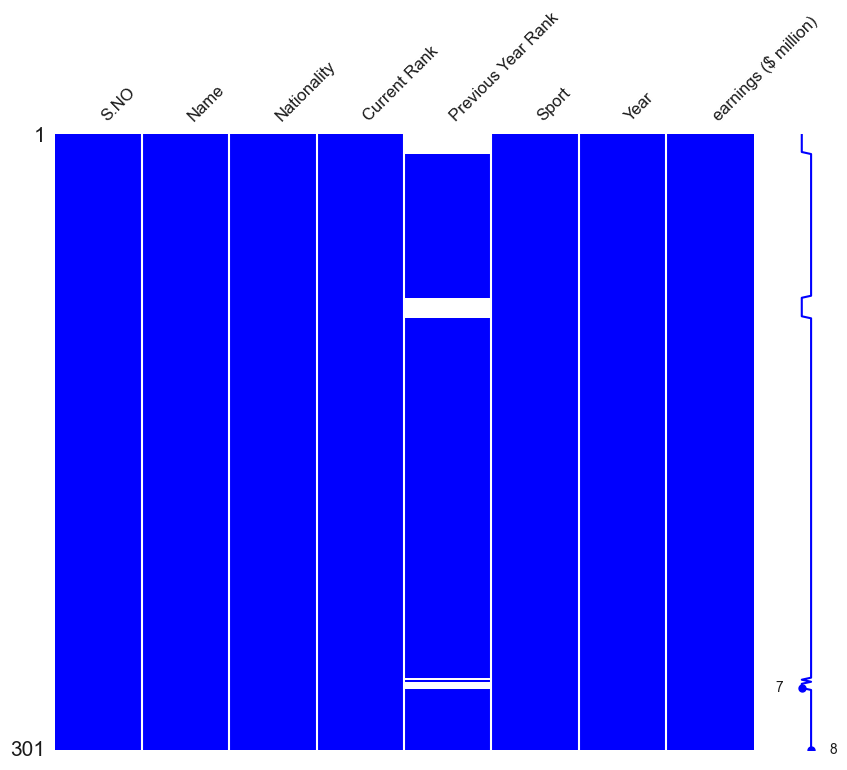

In [192]:
msno.matrix(athlete_df, figsize=(10,8), fontsize=12, color=(0,0,1))

The first major period, which consists of the entire top 8 of 1990 shows that none of the athletes had been ranked before.

Forbes began listing athletes by wealth in 1990 with the introduction of their annual "Forbes 400" list, which initially focused on the wealthiest individuals in the United States. Over the years, Forbes expanded its coverage of athletes' wealth and began publishing specific lists such as the "Forbes Highest-Paid Athletes" and the "Forbes World's Highest-Paid Athletes.

In [193]:
# Filter the dataset for missing 'previous year rank'
prev_year_rank = athlete_df[athlete_df['Previous Year Rank'].isnull()][['Name', 'Previous Year Rank', 'Year']]

print("The following are sports personalities who have a missing value in their previous rankings")
print(prev_year_rank,'\n\n')

# People who have appeared in the list prior to the current year with a missing previous year rank
print('The following have appeared in the list prior to the current year and still have missing values for previous year ranking:')
for i , person in prev_year_rank.iterrows():
    if not athlete_df[(person['Name'] == athlete_df['Name']) & (athlete_df['Year'] < person['Year'])].empty:
        print(person['Year'],' ',person['Name'])
    
# Unique non-numerical values other than NaN in Previous Year Rank column
non_numeric_rank = athlete_df[athlete_df['Previous Year Rank'].str.isnumeric() == False]['Previous Year Rank']

print('\n\nThe following are unique strings found in the \'Previous Year Rank\' column:')
print(non_numeric_rank.unique())

# The number of non-numerical values other than NaN in Previous Year Rank column
print('\n\nThere are: ', len(non_numeric_rank),'non-numerical previous year ranks.')

The following are sports personalities who have a missing value in their previous rankings
                   Name Previous Year Rank  Year
0            Mike Tyson                NaN  1990
1        Buster Douglas                NaN  1990
2     Sugar Ray Leonard                NaN  1990
3          Ayrton Senna                NaN  1990
4           Alain Prost                NaN  1990
5         Jack Nicklaus                NaN  1990
6           Greg Norman                NaN  1990
7        Michael Jordan                NaN  1990
8         Arnold Palmer                NaN  1990
9     Evander Holyfield                NaN  1990
80       Michael Jordan                NaN  1998
81   Michael Schumacher                NaN  1998
82       Sergei Federov                NaN  1998
83          Tiger Woods                NaN  1998
84       Dale Earnhardt                NaN  1998
85           Grant Hill                NaN  1998
86     Oscar De La Hoya                NaN  1998
87        Patrick Ewing    

The missingness of th previous year rank is classified as MCAR.

Having explored the missingness of previous year ranks above, it is clear that the previous year rank column has too many missing values and ranks that have little meaning. As a result, this column will be dropped

In [194]:
athlete_df.drop('Previous Year Rank',axis=1, inplace=True)

The Serial Number column (S.NO) is of no use to the EDA and will be dropped.

In [195]:
athlete_df.drop('S.NO',axis=1, inplace=True)

## 3.3 Uniqueness

Below we examine duplications and any possible text preprocessing for similar names, nationalities, and sports.

In [196]:
# see if there are any columns that are redundant or need further processing
print('The following are unique data columns:\n\n', athlete_df.columns)

# see if there are no duplicate Names, spelling errors for car maker
print('\nThe following are unique car makes:\n\n', athlete_df['Name'].sort_values().unique())


The following are unique data columns:

 Index(['Name', 'Nationality', 'Current Rank', 'Sport', 'Year',
       'earnings ($ million)'],
      dtype='object')

The following are unique car makes:

 ['Aaron Rodgers' 'Aaron Rogers' 'Alain Prost' 'Alex Rodriguez'
 'Andre Agassi' 'Andrew Luck' 'Arnold Palmer' 'Ayrton Senna'
 'Buster Douglas' 'Cam Newton' 'Canelo Alvarez' 'Carson Wentz'
 'Cecil Fielder' 'Conor McGregor' 'Cristiano Ronaldo' 'Dale Earnhardt'
 'Dale Earnhardt Jr.' 'David Beckham' 'Deion Sanders' 'Dennis Rodman'
 'Donovan "Razor" Ruddock' 'Drew Brees' 'Eli Manning' 'Emmit Smith'
 'Evander Holyfield' 'Floyd Mayweather' 'Gary Sheffield' 'George Foreman'
 'Gerhard Berger' 'Grant Hill' 'Greg Norman' 'Jack Nicklaus'
 'Jacques Villeneuve' 'James Harden' 'Jeff Gordon' 'Jim Courier'
 'Joe Montana' 'Joe Sakic' 'Jordan Spieth' 'Kevin Durant' 'Kevin Garnett'
 'Kimi Raikkonen' 'Kirk Cousins' 'Kobe Bryant' 'Lance Armstrong'
 'LeBron James' 'Lennox Lewis' 'Lewis Hamilton' 'Lionel Messi'
 'Man

In [197]:
# See the possible spelling error
athlete_df[athlete_df['Name'].str.contains('Aaron', case=False)]

# Replace with the correct spelling
athlete_df.replace('Aaron Rogers','Aaron Rodgers',inplace=True)

In [198]:
# see if there are no duplicate Sports, spelling errors for car maker
print('\nThe following are unique Sports:\n\n', athlete_df['Sport'].sort_values().unique())


The following are unique Sports:

 ['American Football' 'American Football / Baseball' 'Auto Racing'
 'Auto Racing (Nascar)' 'Auto racing' 'Baseball' 'Basketball' 'Boxing'
 'F1 Motorsports' 'F1 racing' 'Golf' 'Hockey' 'Ice Hockey' 'MMA' 'NASCAR'
 'NBA' 'NFL' 'Soccer' 'Tennis' 'auto racing' 'baseball' 'basketball'
 'boxing' 'cycling' 'golf' 'ice hockey' 'motorcycle gp' 'soccer' 'tennis']


There are sports that have the same name written in different ways.

In [199]:
# THIS FUNCTION IS TAKEN FORM TASK L2T13 PROVIDED BY HYPERIONDEV
# function to replace rows in the provided column of the provided dataframe
# that match the provided string above the provided ratio with the provided string
def replace_matches_in_column(df, column, strings_list, min_ratio = 90):
    # get a list of unique strings
    strings = df[column].unique()
    
    # get the top 10 closest matches to our input string
    for string_to_match in strings_list:
        matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                             limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

        # only get matches with a ratio > 90
        close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

        # get the rows of all the close matches in our dataframe
        rows_with_matches = df[column].isin(close_matches)

        # replace all rows with close matches with the input matches 
        df.loc[rows_with_matches, column] = string_to_match
    
sport_list = ['Auto Racing', 'Baseball', 'Basketball', 'Boxing', 'Golf', 'Soccer', 'Tennis']    
replace_matches_in_column(athlete_df, 'Sport', sport_list, min_ratio = 90)

# Replace the following manually
athlete_df.replace(['Auto Racing (Nascar)', 'NASCAR'], 'Auto Racing', inplace=True)
athlete_df.replace('NBA', 'Basketball', inplace=True)
athlete_df.replace('NFL', 'American Football', inplace=True)
athlete_df.replace(['F1 racing', 'F1 Motorsports'], 'F1 Racing', inplace=True)

# The above function can not be used for ice hockey, since 'ice hockey' is very similar to just 'hockey'
athlete_df.replace('ice hockey', 'Ice Hockey', inplace=True)

#Just to format with Capital letters
athlete_df.replace('cycling', 'Cycling', inplace=True)
athlete_df.replace('motorcycle gp', 'Motorcycle GP', inplace=True)

print('\nThe following are unique Sports:\n\n', athlete_df['Sport'].sort_values().unique())


The following are unique Sports:

 ['American Football' 'American Football / Baseball' 'Auto Racing'
 'Baseball' 'Basketball' 'Boxing' 'Cycling' 'F1 Racing' 'Golf' 'Hockey'
 'Ice Hockey' 'MMA' 'Motorcycle GP' 'Soccer' 'Tennis']


Notice that there is 'Hockey' and 'Ice Hockey'. A closer look at the athlete who plays hockey (Joe Sakic) actually indicates that he plays Ice Hockey.

In [200]:
# Replace Hockey with Ice Hockey
athlete_df.replace('Hockey', 'Ice Hockey', inplace=True)

print('\nThe following are unique Sports:\n\n', athlete_df['Sport'].sort_values().unique())


The following are unique Sports:

 ['American Football' 'American Football / Baseball' 'Auto Racing'
 'Baseball' 'Basketball' 'Boxing' 'Cycling' 'F1 Racing' 'Golf'
 'Ice Hockey' 'MMA' 'Motorcycle GP' 'Soccer' 'Tennis']


## 3.4 Validity

A popular language in the Philippines (country) is Filipino (language).

In [201]:
# see if there are no duplicate Nationalities, spelling errors for car maker
print('\nThe following are unique Nationalities:\n\n', athlete_df['Nationality'].sort_values().unique())

# Replace the Filipino language with the country Philippines
athlete_df.replace('Filipino', 'Philippines', inplace=True)


The following are unique Nationalities:

 ['Argentina' 'Australia' 'Austria' 'Brazil' 'Canada' 'Dominican'
 'Filipino' 'Finland' 'France' 'Germany' 'Ireland' 'Italy' 'Mexico'
 'Northern Ireland' 'Philippines' 'Portugal' 'Russia' 'Serbia' 'Spain'
 'Switzerland' 'UK' 'USA']


A list of top 10 for 30years should contain 300 observations. However, this list contains 301 observations. In 2002, there were pairs of athletes competing for the same number 5, 7, and 10 ranks, which led to 11 athletes being recorded. Note that this is the first list after Forbes had changed the reporting period.

In [202]:
year_counts = athlete_df.groupby('Year').size()
more_entries = year_counts[year_counts > 10].index
print(athlete_df[athlete_df['Year'].isin(more_entries)][['Name', 'Current Rank', 'Year']])

                   Name  Current Rank  Year
110         Tiger Woods             1  2002
111  Michael Schumacher             2  2002
112      Michael Jordan             3  2002
113        Lennox Lewis             4  2002
114          Grant Hill             5  2002
115    Shaquille O'Neal             5  2002
116          Mike Tyson             7  2002
117       Kevin Garnett             7  2002
118         Kobe Bryant             9  2002
119  Jacques Villeneuve            10  2002
120         Jeff Gordon            10  2002


## 3.5 Data Consistency

In [203]:
# See if there are any duplicated observations
print('\nDuplicated observations are:\n\n', athlete_df.loc[athlete_df.duplicated()])


Duplicated observations are:

 Empty DataFrame
Columns: [Name, Nationality, Current Rank, Sport, Year, earnings ($ million)]
Index: []


Seeing an athlete who made it in the Forbes list playing 2 sports deserves a bit of research.

Deion Sanders, also known as "Prime Time," is a former professional athlete who played in both the National Football League (NFL) and Major League Baseball (MLB). 

In [204]:
athlete_df[athlete_df['Sport']=='American Football / Baseball']['Name']

52    Deion Sanders
Name: Name, dtype: object

## 3.6 Outliers in Yearly Earnings

Looking at the earnings of athletes over a 3 decades, there are outliers on the upper side. There a re 5 earnings that are out of the norm over a 3 decade period.

Looking at each year, there are high earnings that would be regarded as outliers for each year. However, seeing that these high earnings are consistent for almost each year, it would be harsh to consider these as outliers. 

The 5 outliers are not anormalies but a true reflection of the athlete's achievements. As such, they cannot be ignored in the below analysis and will be used as they are. Two of the outliers are as a result of the great fight between Floyd Mayweather and Manny Pacquiao which short them to first and second spot respectively on the Forbes list in 2015. 

The purpose of this EDA is to draw insights. When looking at forecasting future earnings, these outliers can be reduced to yield accurate predictions. They will be replaced by the maximum of the box plot where skewness is important in future engineering. 

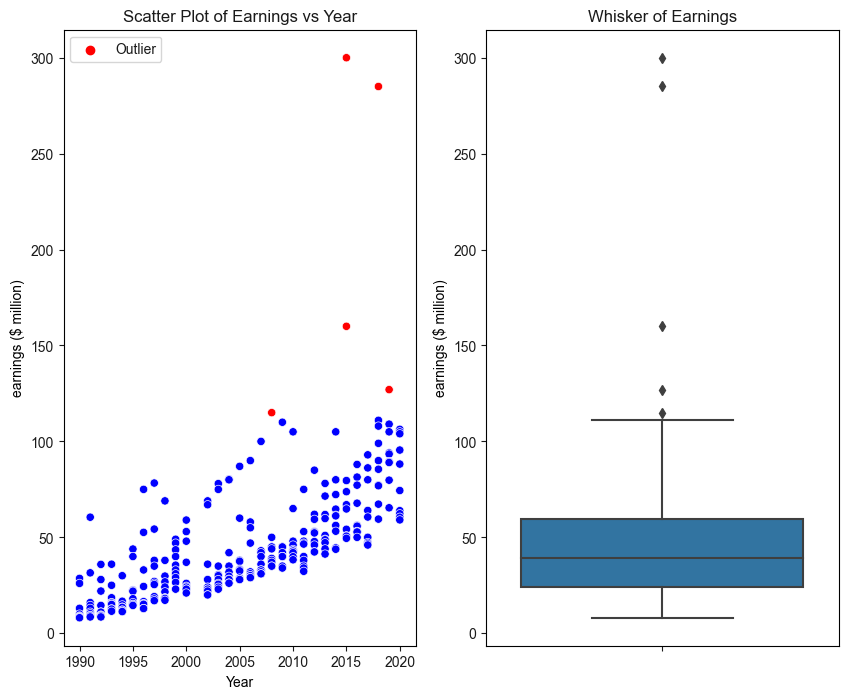


Athletes below have unsuallly high earnings:



,Name,Nationality,Current Rank,Sport,Year,earnings ($ million),Outliers
171,Tiger Woods,USA,1,Golf,2008,115.0,Outlier
241,Floyd Mayweather,USA,1,Boxing,2015,300.0,Outlier
242,Manny Pacquiao,Philippines,2,Boxing,2015,160.0,Outlier
271,Floyd Mayweather,USA,1,Boxing,2018,285.0,Outlier
281,Lionel Messi,Argentina,1,Soccer,2019,127.0,Outlier


In [205]:
# Create figure and axes
fig, axs = plt.subplots(ncols=2, figsize=(10, 8))

# Calculate quartiles and IQR of athlete earnings over 3 decades
earnings = athlete_df['earnings ($ million)']
Q1, Q3 = earnings.quantile([0.25, 0.75])
IQR = Q3 - Q1
upper_Q, lower_Q = Q3 + IQR * 1.5, Q1 - IQR * 1.5

# Create a list of 'Outliers' and 'Non-Outliers' from 'earnings'
outlier_list = ['Outlier' if earn > upper_Q or earn < lower_Q else 'Non-Outlier' for earn in earnings]

# Copy the original athlete_df and dd a new column to indicate outliers
outliers_df = athlete_df.assign(Outliers=outlier_list)

# Plot scatter earnings points over years with outliers in red and non-outliers in blue
sns.scatterplot(outliers_df, x='Year', y='earnings ($ million)', ax=axs[0], hue='Outliers', palette=['blue', 'red'])

# Plot a box for athlete earnings
sns.boxplot(athlete_df, y='earnings ($ million)', ax=axs[1])

# Set titles for subplots
axs[0].set_title('Scatter Plot of Earnings vs Year')
axs[1].set_title('Whisker of Earnings')

# Remove default legend and create custom legend
handles, labels = axs[0].get_legend_handles_labels()
axs[0].legend(handles[1:], labels[1:])  # Exclude the first legend entry

# Show plot
plt.show()

# Show the athletes with earnings out of the norm
print('\nAthletes below have unsuallly high earnings:\n')
outliers_df[outliers_df['Outliers'] =='Outlier']

## 3.7 Text Preprocessing

The 'earnings ($ million)' column will is lengthy for us to work with and will therefore be renamed to just Earnings 

In [206]:
athlete_df.rename(columns ={'earnings ($ million)':'Earnings'}, inplace = True)


# 4. Data Insights

## 4.1 History of Appearances by Athletes, Sports, and Countries

We seek to find Atheltes, Sports and Countries that have dominated the Forbes list in throughout the 3 decade period.

Michael Jordan dominated the list every year since the list's inception for 19 years until 2009. Despite having retired in 2003, he continued to dominate the Forbes list due endorsements, and most notably his deal with Nike for the Air Jordan brand. Michael Jordan stops appearing on the Forbes Richest Athletes List in 2009. In 2006 he part-owned the Charlotte Bobcats (Now the Hornets). He later purchased 89% of the shares of the Hornets in 2010. On the Forbes list, he is now ranked in other cartegories other than an 'Athlete' since his fortunes are now partly dervied from other sources other than his athletic career.

Tiger Woods scooped 19 appearances out of the 23 years between his first and recent appearances. As will be seen below, he has been ranked the hishest paid at the top 11 times out of the 19.

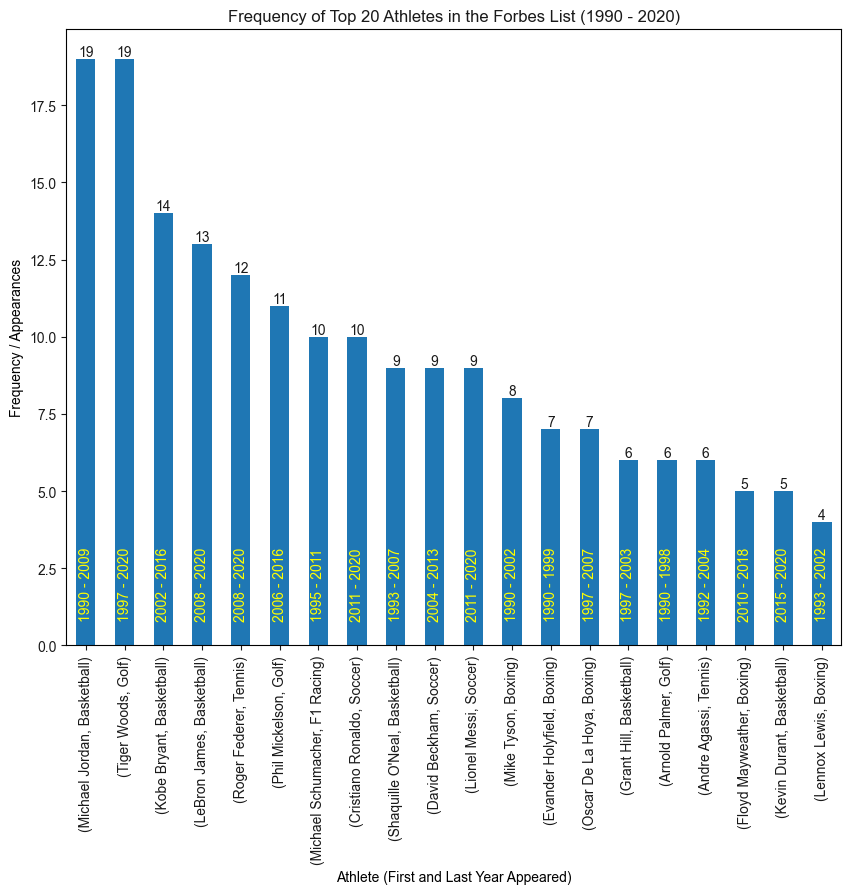

In [207]:
# Group the data by athlete and sport, sort by the number of times the athlete appears in the data
athlete_freq = athlete_df.groupby(['Name', 'Sport']).size().sort_values(ascending=False).head(20)

# Group the data by athlete and find the first and last year of appearance
athlete_first_year = athlete_df.groupby('Name')['Year'].min()
athlete_last_year = athlete_df.groupby('Name')['Year'].max()

# Select the top 20 athletes ranked number 1 the most times
top_20_athletes = [athlete[0] for athlete in athlete_freq.index]

# Get the first and last year of appearance for the top 20 athletes
top_20_first_year = athlete_first_year.loc[top_20_athletes]
top_20_last_year = athlete_last_year.loc[top_20_athletes]

plt.figure(figsize = (10, 8))

# Plot the frequency of athletes
ax = athlete_freq.plot.bar()

# Set labels and title
plt.xlabel('Athlete (First and Last Year Appeared)')
plt.ylabel('Frequency / Appearances')
plt.title('Frequency of Top 20 Athletes in the Forbes List (1990 - 2020)')
plt.xticks(rotation=90)

# Annotate each bar with the frequency value
for i, v in enumerate(athlete_freq):
    ax.text(i, v, str(v), ha='center', va='bottom')

    # Plot the first and last year of appearance as vertical lines
for i, athlete in enumerate(top_20_athletes):
    ax.text(i, 0.8, f'{top_20_first_year[athlete]} - {top_20_last_year[athlete]}', ha='center', va='bottom', rotation=90, color='yellow')

 
plt.show()

Only less than 10 athletes have attained the Number 1 highest paid athlete in 30 years, with Tiger Woods and Michael Jordan accounting for just over 50% of this position.

Tiger Woods held this position 10 years continuosly from 2002 to 2011 and for the eleventh time in 2013. We see that 6 out of 10 times Woods has attained first position on the list.

Soccer and Tennis are newest sports to take first position in highest paid athletes in 2016 (Cristiano Ronald) and 2020 (Roger Feder) respectively.

Note the absence of rankings in 2001 due to changes in Forbes reporting period.

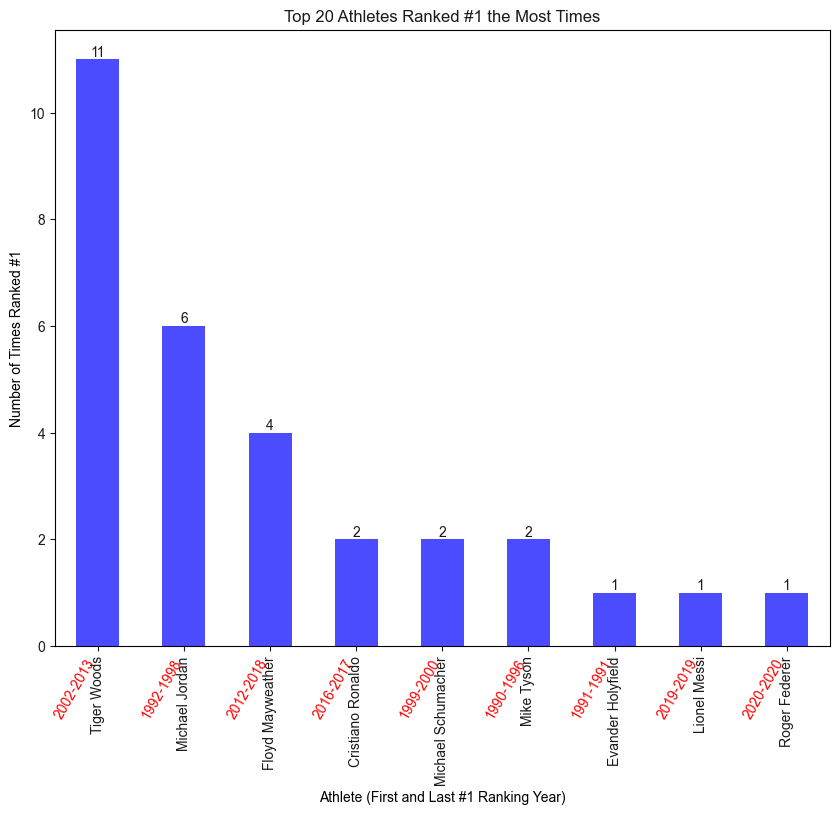

In [208]:
# Group the data by athlete and find the first and last year of appearance
athlete_first_year = athlete_df.groupby('Name')['Year'].min()
athlete_last_year = athlete_df.groupby('Name')['Year'].max()

# Group the data by athlete and count the number of times they were ranked number 1
athlete_rank1_count = athlete_df[athlete_df['Current Rank'] == 1].groupby('Name').size().sort_values(ascending=False).head(20)

# Select the top 20 athletes ranked number 1 the most times
top_20_athletes = athlete_rank1_count.index

# Get the first and last year of being ranked number 1 for the top 20 athletes
top_20_first_year = athlete_df[(athlete_df['Name'].isin(top_20_athletes)) & (athlete_df['Current Rank'] == 1)].groupby('Name')['Year'].min()
top_20_last_year = athlete_df[(athlete_df['Name'].isin(top_20_athletes)) & (athlete_df['Current Rank'] == 1)].groupby('Name')['Year'].max()

plt.figure(figsize=(10, 8))

# Plot the number of times athletes were ranked number 1
ax = athlete_rank1_count.plot.bar(color='blue', alpha=0.7)

# Annotate each bar with the count value
for i, v in enumerate(athlete_rank1_count):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Plot the first and last time ranked number 1 as vertical lines
for i, athlete in enumerate(top_20_athletes):
    ax.text(i, -0.8, f'{top_20_first_year[athlete]}-{top_20_last_year[athlete]}', ha='right', va='center', rotation=60, color='red')

# Set labels and title
ax.set_xlabel('Athlete (First and Last #1 Ranking Year)')
ax.set_ylabel('Number of Times Ranked #1')
plt.title('Top 20 Athletes Ranked #1 the Most Times')

# Adjust the x-axis tick labels rotation
plt.xticks(rotation=90)

plt.show()

Basketball has the most appearances on the Forbes list, thankfully to Michael Jordan, the late Kobe Bryant, and LeBron James. Cycling, and Martial Arts have only appeared once in the Forbes List.

Lance Armstrong (Cycling) made a top 10 debut in 2005 and that was the first and last time a cyclist made it to the Forbes list. He has since admitted to dopping n his career and lost oppotunities to put clycling on the map.

Deon Sanders (American Football / Baseball) has only appeared once in the list simultaneously representing American Football and Baseball.

Conor McGregor (MMA - Mixed Martial Arts) has alos appeared once in the list in 2018.

One of the Tennis athletes Monica Seles is the only female to make it into the top 10 of the Forbes list and this was in 1992, just 3 years after the list was established.

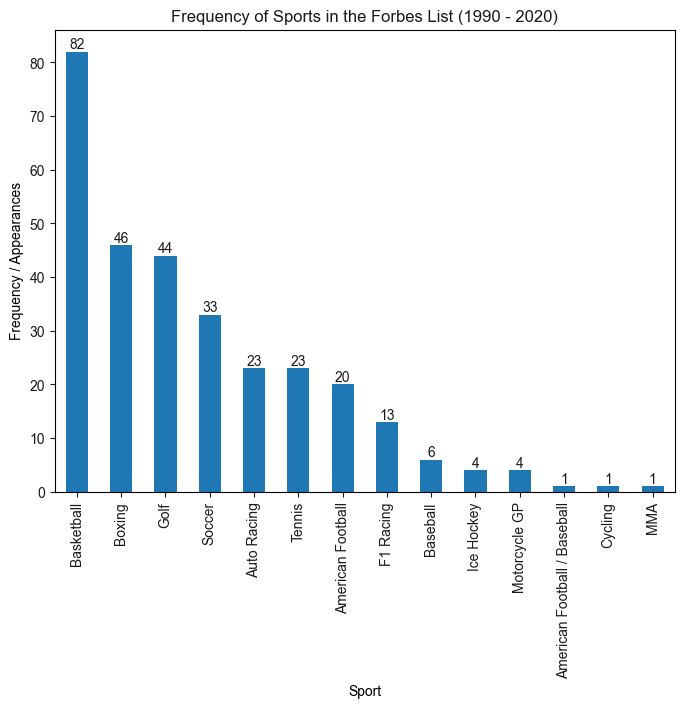

                Name    Sport  Year  Earnings Nationality
149  Lance Armstrong  Cycling  2005      28.0         USA
               Name Sport  Year  Earnings Nationality
274  Conor McGregor   MMA  2018      99.0     Ireland
             Name                         Sport  Year  Earnings Nationality
52  Deion Sanders  American Football / Baseball  1995      22.5         USA


In [209]:
sport_freq = athlete_df.groupby(by='Sport').size().sort_values(ascending=False)

plt.figure(figsize = (8, 6))

ax = sport_freq.plot.bar()

plt.xlabel('Sport')
plt.ylabel('Frequency / Appearances')
plt.title('Frequency of Sports in the Forbes List (1990 - 2020)')
plt.xticks(rotation=90)

# Annotate each bar with the frequency value
for i, v in enumerate(sport_freq):
    ax.text(i, v, str(v), ha='center', va='bottom')
    
plt.show()

print(athlete_df[athlete_df['Sport'] == 'Cycling'][['Name', 'Sport', 'Year', 'Earnings', 'Nationality']])
print(athlete_df[athlete_df['Sport'] == 'MMA'][['Name', 'Sport', 'Year', 'Earnings', 'Nationality']])
print(athlete_df[athlete_df['Name'] == 'Deion Sanders'][['Name', 'Sport', 'Year', 'Earnings', 'Nationality']])

Michael Schumacher, Roger Feder, Cristiano Ronaldo, and Lionel Messi have single handed represented Germany, Switzerland, Portugal and Argentina respectively.

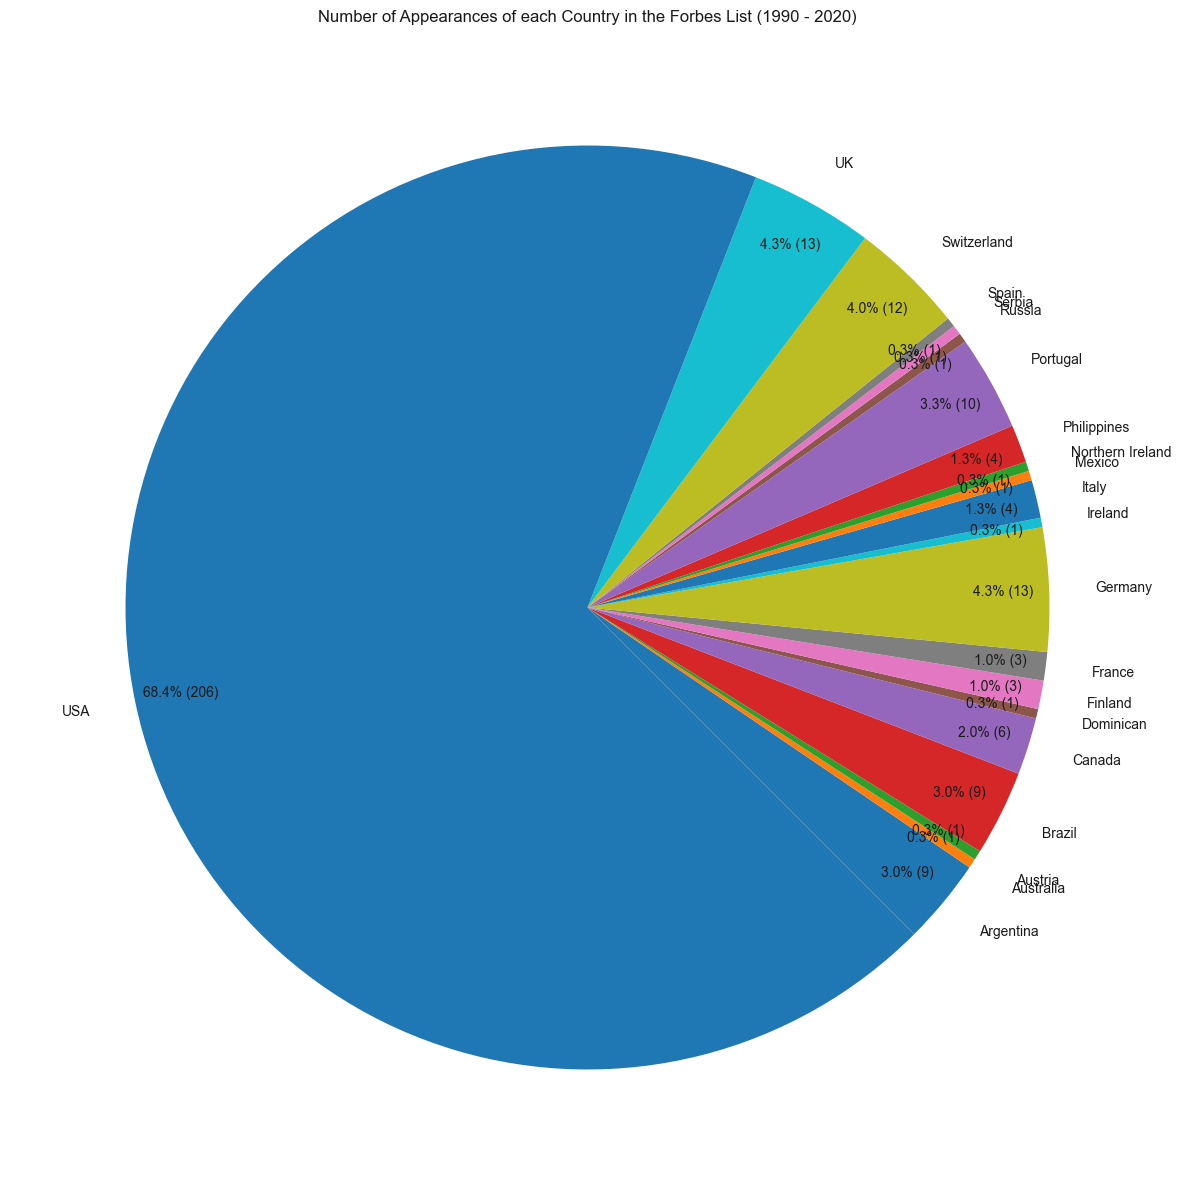

In [210]:
country_freq = athlete_df.groupby(['Nationality'])['Name'].count()

plt.figure(figsize = (15, 15))

autopct_func = lambda p: '{:.1f}% ({:.0f})'.format(p, (p / 100) * country_freq.sum())
plt.pie(country_freq, labels = country_freq.index,  autopct = autopct_func, startangle = -45, pctdistance = 0.9)


plt.title('Number of Appearances of each Country in the Forbes List (1990 - 2020)')
 
plt.show()

Of the 82 athletes to ever make it into the top 10 highest earning atheletes of the annual Forbes list, 55 are from the United States alone. After the USA, there are only 3 countries with multiple representatives namely Canada (4), UK (3), and Bazil (3).

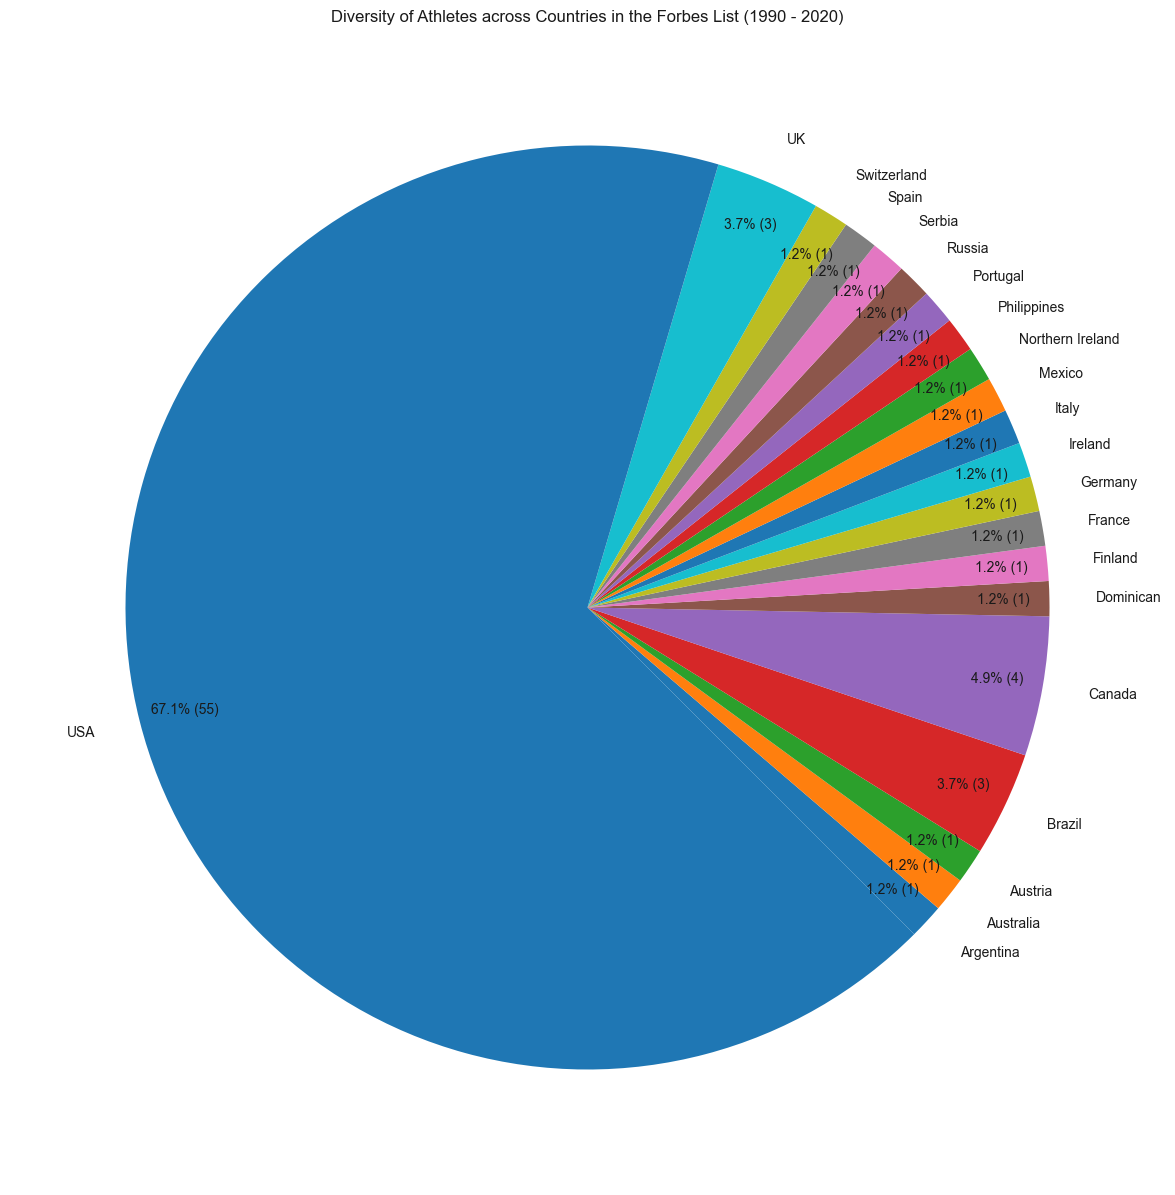

In [211]:
name_country_freq = athlete_df.groupby(['Nationality'])['Name'].nunique()

plt.figure(figsize = (15, 15))

autopct_func = lambda p: '{:.1f}% ({:.0f})'.format(p, (p / 100) * name_country_freq.sum())
plt.pie(name_country_freq, labels = name_country_freq.index,  autopct = autopct_func, startangle = -45, pctdistance = 0.9)


plt.title('Diversity of Athletes across Countries in the Forbes List (1990 - 2020)')
 
plt.show()

The USA has been active in the list since the list was established in 1990. Australia and Austria have only made it once in the list in the early 90s and have since disappered.

Reading the chart horizontally, we see that in the years, 1996, 1999, and 2000, the USA almost scooped all top 10 positions. In all these years Michael Schumacher made an entry denying the USA a white wash into the list. In 2011 the most number of countries was represented in the Forbes list by 7 nations with USA represented by only 4 entries.

Brazil has made periodic appearances. In the early 90s Arton Senna, won World Championships in 1988, 1990, and 1991. He passed on while leading a race in 1994, hence his last appearance on the list in 1993.

The second period is that of Ronaldinho who once played for Barcelona FC. As much as he is great football player, one wonders how the likes of Ronaldo who who led Brazil to world cup victory never made it on the list, even as a reciepient of the FIFA player of the year awards in 3 occusions.

Neymar Jr takes the third period while playing for PSG. Neymar had played for Barcelona FC before joining PSG.



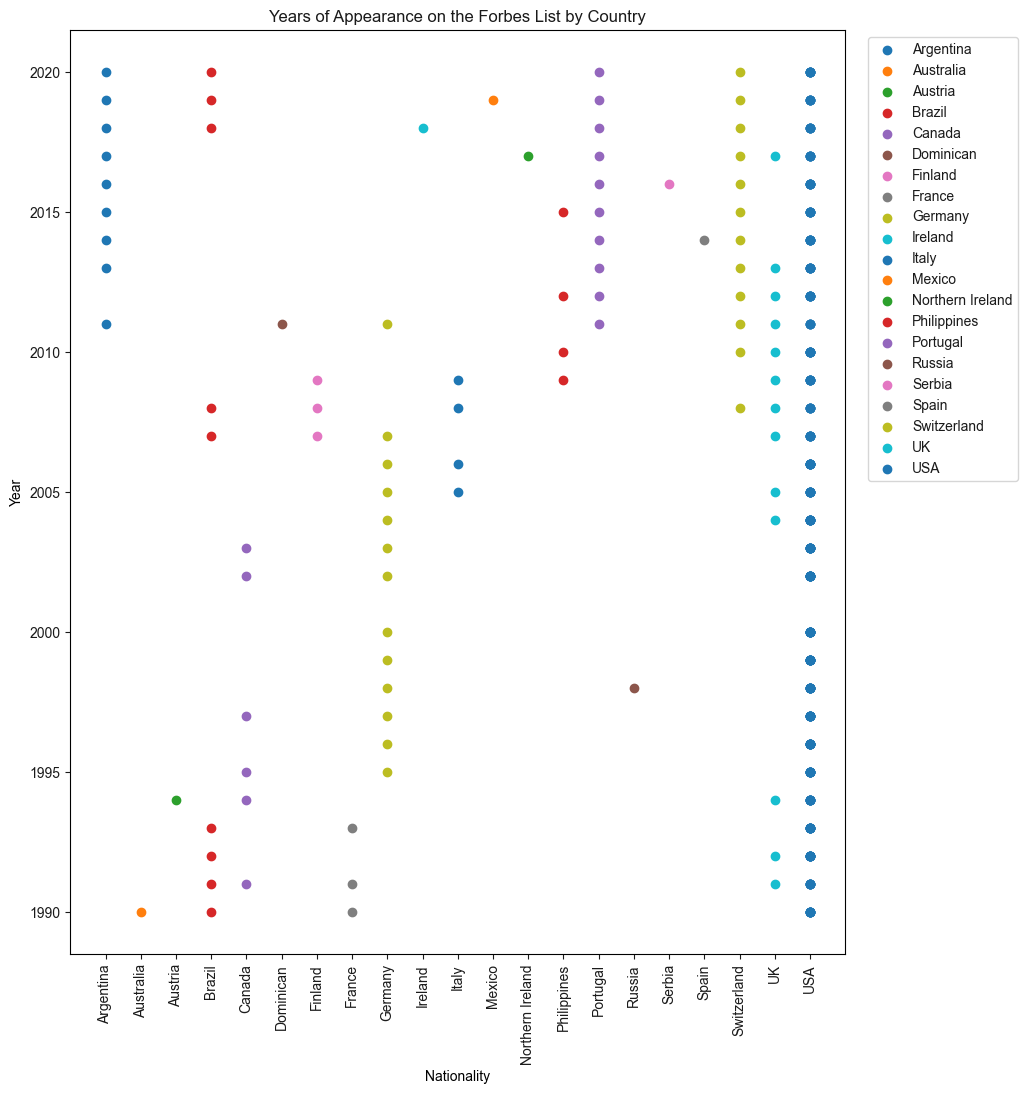

In [212]:
# Group the data by country and collect the years of appearance as a list
country_years = athlete_df.groupby('Nationality')['Year'].apply(list)

plt.figure(figsize=(10, 12))

# Plot all the years of appearance as scatter points
for i, (country, years) in enumerate(country_years.items()):
    plt.scatter([i] * len(years), years, label=country, marker='o')

# Set labels and title
plt.xlabel('Nationality')
plt.ylabel('Year')
plt.title('Years of Appearance on the Forbes List by Country')

# Add legend and rotate x-axis labels
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(range(len(country_years)), country_years.index, rotation=90)

plt.show()

More than 50% of athletes are involved in American Football (19%), Boxing(17%), and Basketball (14.5%).
All Amercan Football and Basketball athletes are American nationals. Of the 12 in boxing, Manny Pacquiao or former senator of the Philipines, is 1 of 3 Non-US nationals in the boxing arena. These numbers are primary reason of the USA’s domination in the Forbes Lists.

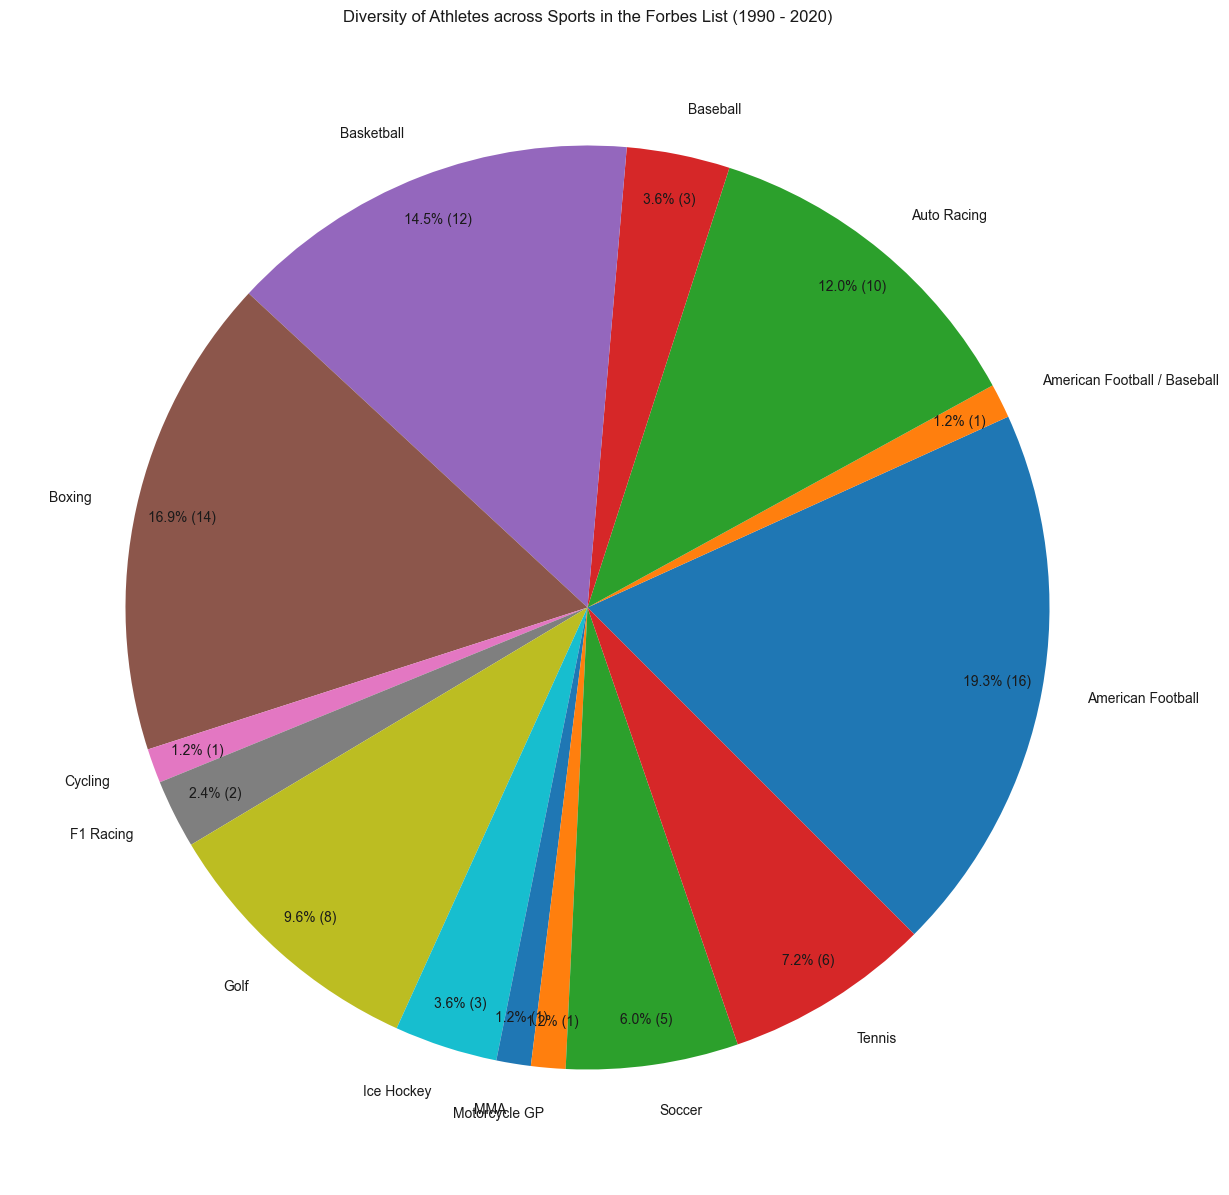

In [213]:
# Group the data by sport and count the unique names of athletes in each sport
name_sport_freq = athlete_df.groupby(['Sport'])['Name'].nunique()

# Plot the number of sportsman in each sport as a percentage of all sports personalities. 
plt.figure(figsize = (15, 15))

autopct_func = lambda p: '{:.1f}% ({:.0f})'.format(p, (p / 100) * name_sport_freq.sum())
plt.pie(name_sport_freq, labels = name_sport_freq.index,  autopct = autopct_func, startangle = -45, pctdistance = 0.9)

plt.title('Diversity of Athletes across Sports in the Forbes List (1990 - 2020)')
 
plt.show()

## 4.2 Identify High-Earning Individuals, Sports, and Countries

Looking at the highest earning athletes of each decade, we see that Michael Jordan (Basketball) dominated the 90s decade, followed by Tiger Woods (Golf) after 2000, and finally Cristiano Ronaldo (Soccer) after 2010.

Tiger woods has a strong presence in all 3 decades.

For the 1990s and 2000s decades Michael Jordan and Tiger Woods were easily acuumulating high earnings with little competition. For the 2010s decade, competition is high with all the top 5 earners falling wthin a range of 700 and 800 million dollars. 

Boxing, Golf, and Basketball are dominating the first 2 decades. The last decade is seeing a rise in soccer and tennis athletes take up the top rankings of the Forbes lists.

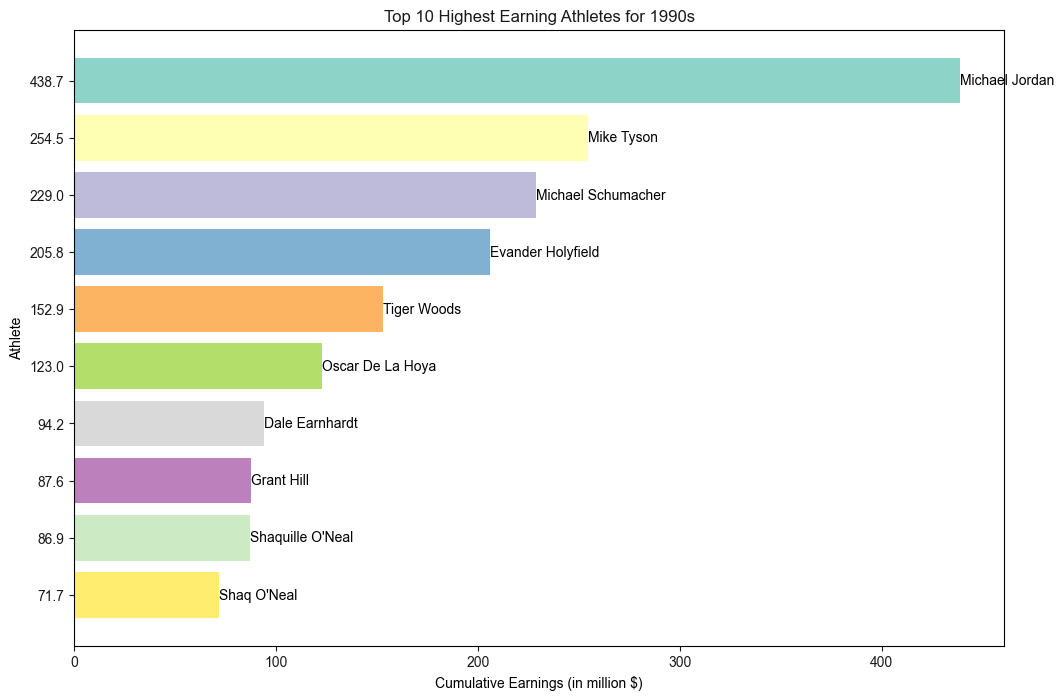

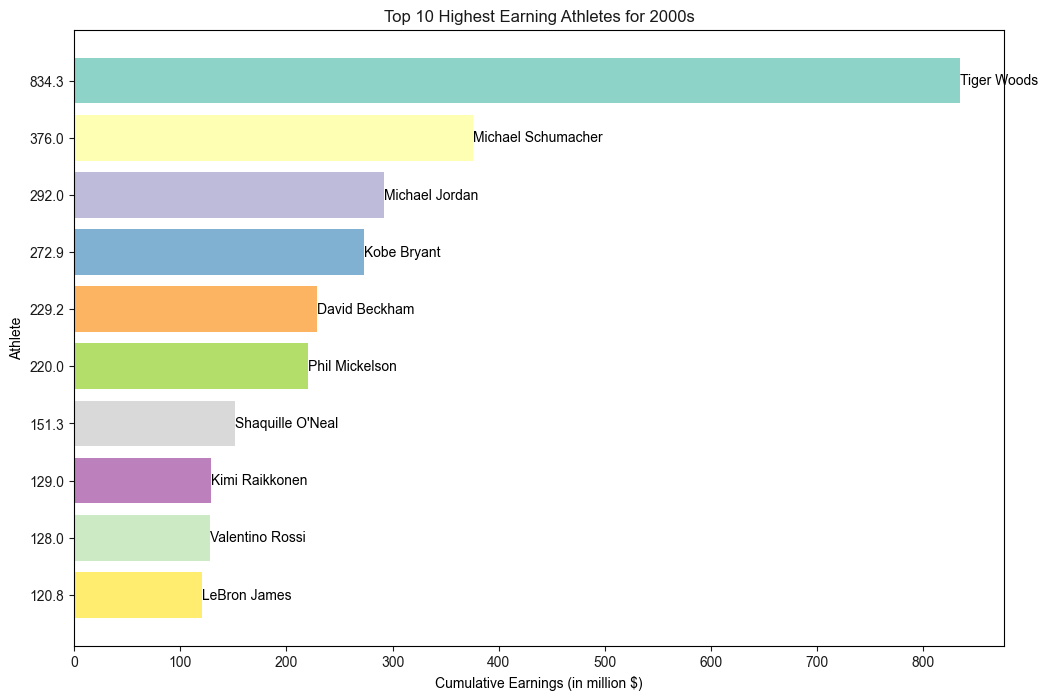

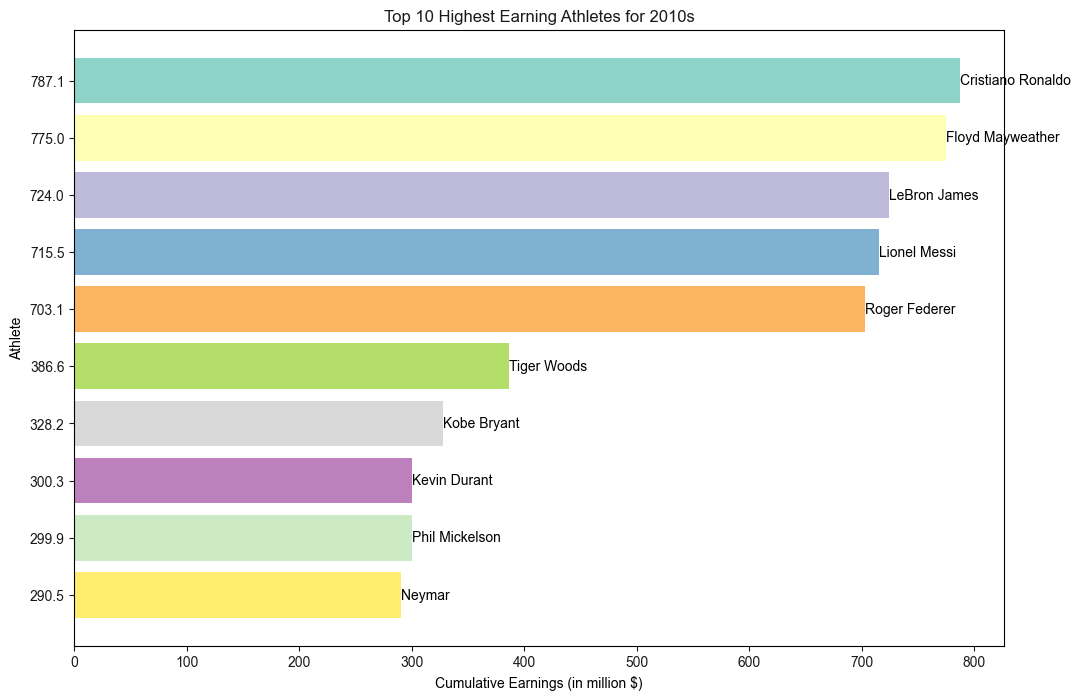

In [214]:
athlete_df['Year'] = pd.to_datetime(athlete_df['Year'], format='%Y')

# Group the data by athlete and year, and calculate the cumulative earnings for each athlete
athlete_cum_earnings = athlete_df.groupby(['Name', 'Year'])['Earnings'].sum().groupby('Name').cumsum()

# Define the bins
bins = [pd.to_datetime('1990'), pd.to_datetime('2000'), pd.to_datetime('2010'), pd.to_datetime('2021')]

# Create a new column 'Decade' based on the bins
athlete_df['Decade'] = pd.cut(athlete_df['Year'], bins=bins, labels=['1990s', '2000s', '2010s'])

# Group the data by decade and athlete, and calculate the cumulative earnings for each athlete within each decade
athlete_decade_earnings = athlete_df.groupby(['Decade', 'Name'])['Earnings'].sum().reset_index()

# Find the top 10 highest earning athletes for each decade
top_10_earnings = athlete_decade_earnings.groupby('Decade').apply(lambda x: x.nlargest(10, 'Earnings')).reset_index(drop=True)

# Define a color palette
color_palette = plt.get_cmap('Set3')



# Iterate over each decade
for i, decade in enumerate(top_10_earnings['Decade'].unique()):
    decade_athletes = top_10_earnings[top_10_earnings['Decade'] == decade]
    
    # Create a bar graph
    plt.figure(figsize=(12, 8))
    colors = color_palette(np.linspace(0, 1, len(decade_athletes)))
    plt.barh(range(len(decade_athletes)), decade_athletes['Earnings'], color=colors)
    
    # Add athlete names on each bar
    for j, (name, earnings) in enumerate(zip(decade_athletes['Name'], decade_athletes['Earnings'])):
        plt.text(earnings, j, name, ha='left', va='center', color='black')
    
    plt.gca().invert_yaxis()  # Invert y-axis to show the top earners at the top
    plt.xlabel('Cumulative Earnings (in million $)')
    plt.ylabel('Athlete')
    plt.title(f'Top 10 Highest Earning Athletes for {decade}')

    plt.yticks(range(len(decade_athletes)), decade_athletes['Earnings'].apply(lambda x : round(x,2)))

    plt.show()


Average earnings are calculated over all sport personalities in that particular sport including the very high and verl eaners in that sport.

As popular as it may seem, on average soccer started paying athletes very highly in 2004, with David Beckham breaking the inexistence. With  the exception of 2006, soccer has been paying athletes highly with more athletes part taking in the Forbes list. Tennis earnings are consistently rising, much thanks to Roder Feder who in 202 was the number highest paid athlete. He truely has put tennis on a global map. hOwever, Roger is the only Tennis athlete to ever gain the top spot of highest athlete earners.

The very high spikes in avergae earning for boxing seen in 2015 are that of Floyd Mayweather Jr and Manny Pacquiao. These have earlier been recorded as very excessive earnings with their respective earnings of 300 million and 160 million dollars totalling to 460 million compared to the 490 million dollars of all the 8 highest athlete earners of 2015. 

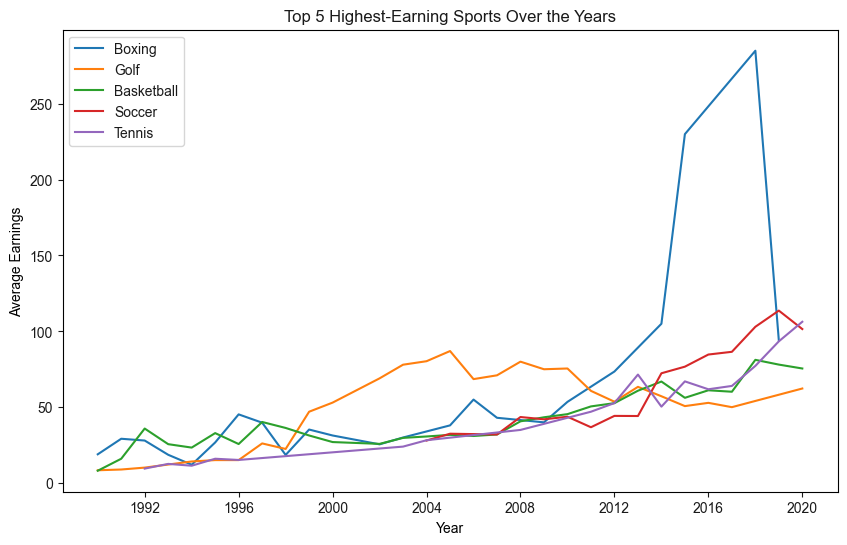

In [215]:
# Group the data by year and sport and calculate the average earnings for each sport in each year
sport_earnings = athlete_df.groupby(['Year', 'Sport'])['Earnings'].mean()

# Find the top 5 highest-earning sports
top_5_sports = sport_earnings.groupby('Sport').sum().nlargest(5).index

# Filter the data for the top 5 sports
top_5_earnings = sport_earnings[sport_earnings.index.get_level_values('Sport').isin(top_5_sports)]

# Reset the index to make the 'Year' and 'Sport' columns accessible for plotting
top_5_earnings = top_5_earnings.reset_index()

# Plot the line plots for each sport
plt.figure(figsize=(10, 6))
for sport in top_5_sports:
    sport_data = top_5_earnings[top_5_earnings['Sport'] == sport]
    plt.plot(sport_data['Year'], sport_data['Earnings'], label=sport)

plt.xlabel('Year')
plt.ylabel('Average Earnings')
plt.title('Top 5 Highest-Earning Sports Over the Years')
plt.legend()
plt.show()


The Philipines  average earnings were as a result of Manny, after his bid fight with Floyd Mayweather.
Germany's average earnings have dropped since Michael Schumacher's aging and eventaully retierment from F1 racing.
Switzerland, Portugal, Argentina, and Brazil have dominated rising earnings in recent years. However, these earnings are as a result of individual sportsman. 

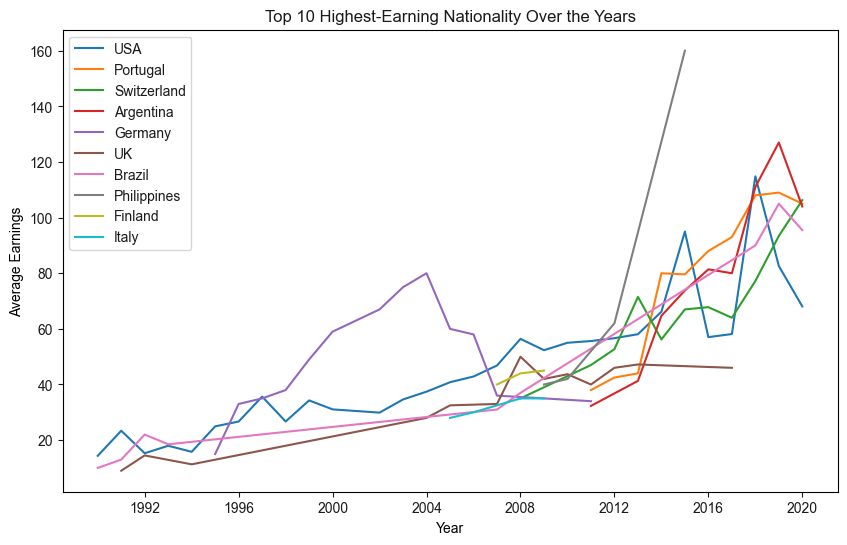

In [216]:
# Group the data by year and sport and calculate the average earnings for each sport in each year
sport_earnings = athlete_df.groupby(['Year', 'Nationality'])['Earnings'].mean()

# Find the top 5 highest-earning sports
top_5_sports = sport_earnings.groupby('Nationality').sum().nlargest(10).index

# Filter the data for the top 5 sports
top_5_earnings = sport_earnings[sport_earnings.index.get_level_values('Nationality').isin(top_5_sports)]

# Reset the index to make the 'Year' and 'Sport' columns accessible for plotting
top_5_earnings = top_5_earnings.reset_index()

# Plot the line plots for each sport
plt.figure(figsize=(10, 6))
for sport in top_5_sports:
    sport_data = top_5_earnings[top_5_earnings['Nationality'] == sport]
    plt.plot(sport_data['Year'], sport_data['Earnings'], label=sport)

plt.xlabel('Year')
plt.ylabel('Average Earnings')
plt.title('Top 10 Highest-Earning Nationality Over the Years')
plt.legend()
plt.show()

Finally, to conlude the EDA, we examine the accumulated earnings of each athlete and show only the top 20 perfoming athletes at a time. 

A race of accumulated earnings amongs athletes is shown on the video below. 

In [217]:
athlete_df['Year'] = pd.to_datetime(athlete_df['Year'], format='%Y')

# Group the data by athlete and year, and calculate the cumulative earnings for each athlete
athlete_cum_earnings = athlete_df.groupby(['Name', 'Year'])['Earnings'].sum().groupby('Name').cumsum()

# Pivot the data to have each athlete as a column and years as index
pivot_table = athlete_cum_earnings.reset_index().pivot(index='Year', columns='Name', values='Earnings')

# Sort the columns based on the latest year's earnings
pivot_table = pivot_table[pivot_table.columns.sort_values(ascending=False)]

# Forward-fill missing values with previous year's earnings
pivot_table = pivot_table.ffill(axis=0)

# Generate the bar chart race
bcr.bar_chart_race(
    df=pivot_table,
    filename='athlete_earnings_race.mp4',
    orientation='h',
    sort='desc',
    n_bars=10,
    bar_size=.85,
    steps_per_period=10,
    interpolate_period=False,
    period_length=900,
    label_bars=True,
    period_label={'x': .8, 'y': .25, 'ha': 'right', 'va': 'center'},
    period_fmt='%Y',
    period_summary_func=lambda v, r: {'x': .9, 'y': .1,
                                      's': f'Total Earnings: {v.nlargest(10).sum():,.0f}',
                                      'ha': 'right', 'size': 16, 'family': 'Arial'},
    perpendicular_bar_func='mean',
    figsize=(11, 8),
    dpi=72,
    cmap='dark12',
    title='Athlete Cumulative Earnings ($ Million) Over the Years',
    title_size=18,
    bar_label_size=14,
    tick_label_size=14,
    shared_fontdict={'family' : 'Arial', 'color' : '.1', 'size': 20},
    scale='linear',
    writer=None,
    fig=None,
    bar_kwargs={'alpha': .8},
    filter_column_colors=True
)

# Specify the path to the generated video file
video_path = 'athlete_earnings_race.mp4'

# Display the video in the Jupyter Notebook
Video(video_path)

C:\Users\fortu\AppData\Roaming\Python\Python311\site-packages\bar_chart_race\_make_chart.py:284: UserWarning: Glyph 127 () missing from current font.
  fig.canvas.print_figure(io.BytesIO())
C:\Users\fortu\AppData\Roaming\Python\Python311\site-packages\bar_chart_race\_make_chart.py:284: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(io.BytesIO())
C:\Users\fortu\AppData\Roaming\Python\Python311\site-packages\bar_chart_race\_make_chart.py:284: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(io.BytesIO())
C:\Users\fortu\AppData\Roaming\Python\Python311\site-packages\bar_chart_race\_make_chart.py:284: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(io.BytesIO())
C:\Users\fortu\AppData\Roaming\Python\Python311\site-packages\bar_chart_race\_make_chart.py:284: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(io.BytesIO())
C:\Users\fortu\AppData\Roaming\Py